# Basic Soccer Event Visualization

This Jupyter Notebook shows some basic soccer visualization. In particular, it covers some great free libraries, such as `ggsoccer` and `soccermatics`, which work well with Opta-style data. Additionally, this notebook covers three comon types of plots: pass maps, heatmaps and shot charts. 

Let's start by calling in our libraries and data. We wrap the library calls with `suppressMessages()` to reduce the amount of warning messages we receive. If you are new to the StatsBomb data, we cover it in the `01_basic_match_event_data` notebook.

In [2]:
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(ggsoccer))
suppressMessages(library(soccermatics))
suppressMessages(library(StatsBombR))

event_data <- StatsBombFreeEvents()

Warning message:
“replacing previous import ‘foreach::accumulate’ by ‘purrr::accumulate’ when loading ‘StatsBombR’”Warning message:
“replacing previous import ‘jsonlite::flatten’ by ‘purrr::flatten’ when loading ‘StatsBombR’”Warning message:
“replacing previous import ‘foreach::when’ by ‘purrr::when’ when loading ‘StatsBombR’”

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."
[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."
[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


Let's visualize some passes for Yuki Nagasato, a midfielder for the Chicago Red Stars. Essentially, we are getting the x,y coordinate data of the start and the end of the pass event. Then, our visualization packages take care of the rest! For this demonstration, we only use completed passes.

In [3]:
passes_yuki <- event_data %>% filter(type.name == "Pass") %>% filter(pass.outcome.name %in% c(NA, "Incomplete", "Out")) %>% filter(player.name == "Yuki Nagasato")

passes_yuki$start_x <- NA
passes_yuki$start_y <- NA
passes_yuki$end_x <- NA
passes_yuki$end_y <- NA

for(r in 1:nrow(passes_yuki)) {
    start_loc <- unlist(passes_yuki$location[r])
    passes_yuki$start_x[r] <- start_loc[1]
    passes_yuki$start_y[r] <- start_loc[2]
    end_loc <- unlist(passes_yuki$pass.end_location[r])
    passes_yuki$end_x[r] <- end_loc[1]
    passes_yuki$end_y[r] <- end_loc[2]
}

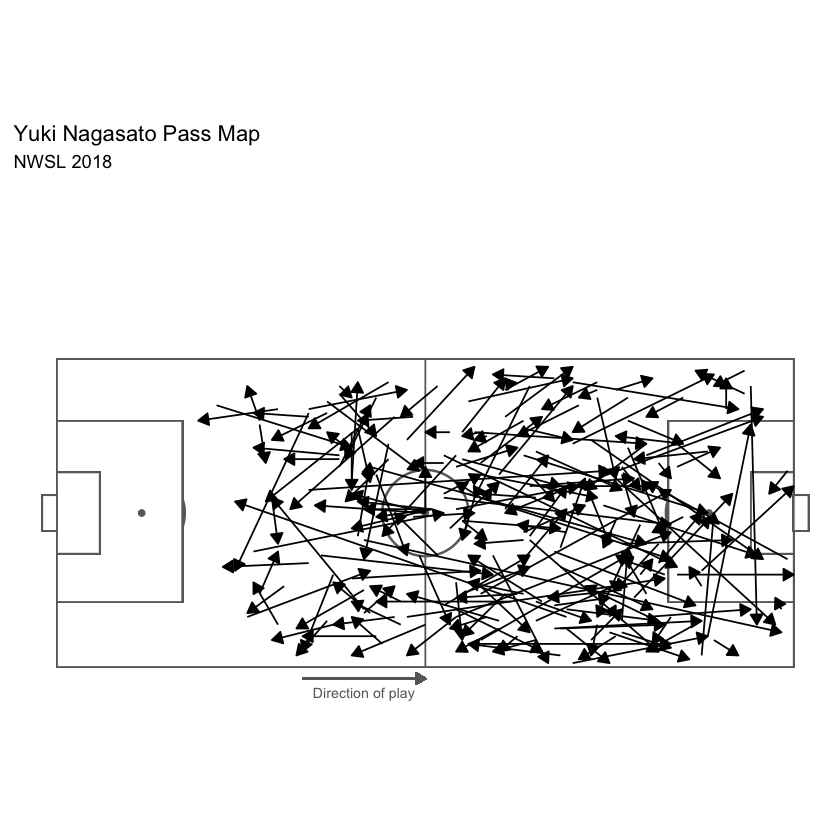

In [4]:
ggplot(passes_yuki) +
  annotate_pitch(x_scale = 1.2, y_scale = 0.8) +
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.25, "cm"),
                             type = "closed")) +
  theme_pitch() +
  direction_label() +
  xlim(-1, 120) +
  ylim(-5, 120) +
  ggtitle("Yuki Nagasato Pass Map", 
          "NWSL 2018")

Let's say, however, that you want to see the passes conditioned on the pass outcome, found in `pass.outcome.name` or `pass.outcome.id`. We can simply add this as `aes(..., col = pass.outcome.name)`, which will colour the passes based on the outcome. NA outcomes are assumed to be complete passes.

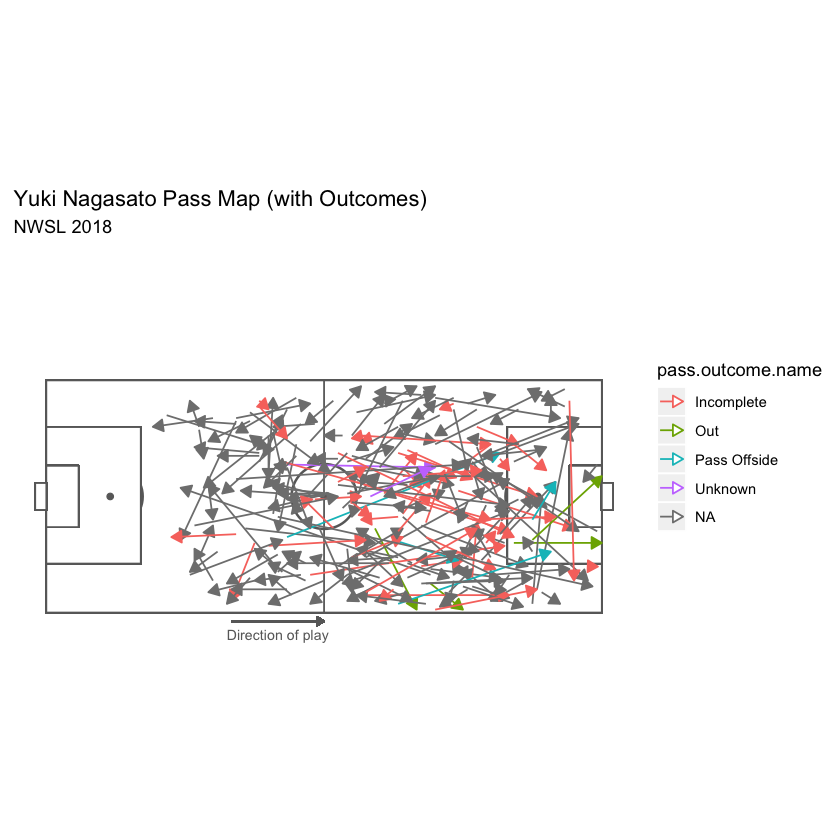

In [8]:
passes_yuki <- event_data %>% filter(type.name == "Pass") %>% filter(player.name == "Yuki Nagasato")

passes_yuki$start_x <- NA
passes_yuki$start_y <- NA
passes_yuki$end_x <- NA
passes_yuki$end_y <- NA

for(r in 1:nrow(passes_yuki)) {
    start_loc <- unlist(passes_yuki$location[r])
    passes_yuki$start_x[r] <- start_loc[1]
    passes_yuki$start_y[r] <- start_loc[2]
    end_loc <- unlist(passes_yuki$pass.end_location[r])
    passes_yuki$end_x[r] <- end_loc[1]
    passes_yuki$end_y[r] <- end_loc[2]
}

ggplot(passes_yuki) +
  annotate_pitch(x_scale = 1.2, y_scale = 0.8) +
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y, col = pass.outcome.name),
               arrow = arrow(length = unit(0.25, "cm"),
                             type = "closed")) +
  theme_pitch() +
  direction_label() +
  xlim(-1, 120) +
  ylim(-5, 120) +
  ggtitle("Yuki Nagasato Pass Map (with Outcomes)", 
          "NWSL 2018")

We can also do a heatmap of the locations from where Yuki initiates her passes. Heatmaps are slightly easier to digest, as they dilute information into cells and colors. Here, we simply plot the density of where Yuki initiates her passes.

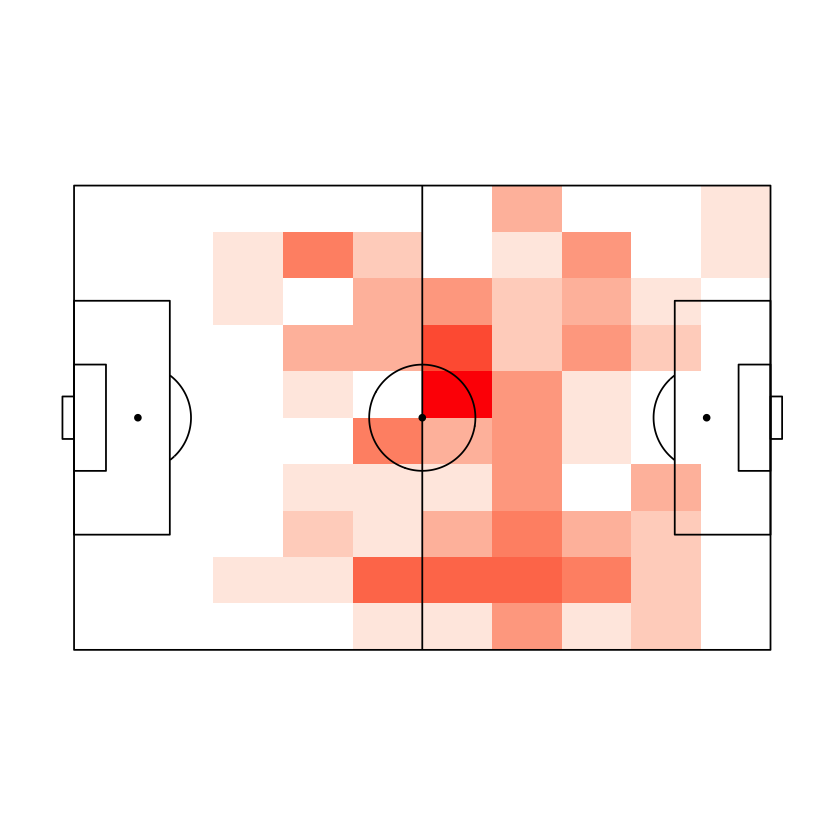

In [9]:
passes_yuki_sm <- passes_yuki %>% select(start_x, start_y)
names(passes_yuki_sm) <- c("x", "y")
soccerHeatmap(passes_yuki_sm, lengthPitch = 120, widthPitch = 80, xBins = 10)

Next, we'll cover shots and goals. Let's look at Marta Vieira da Silva's (known as Marta) shots. Red indicates a goal, and the size of the circle indicates StatsBomb's xG value.

In [12]:
shots_marta <- event_data %>% filter(type.name == "Shot") %>% filter(player.name == "Marta Vieira da Silva")

shots_marta$location.x <- NA
shots_marta$location.y <- NA

for(r in 1:nrow(shots_marta)) {
    loc <- unlist(shots_marta$location[r])
    shots_marta$location.x[r] <- loc[1]
    shots_marta$location.y[r] <- loc[2]
}

shots_marta <- shots_marta %>% select(location.x,location.y,shot.statsbomb_xg,shot.outcome.name)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


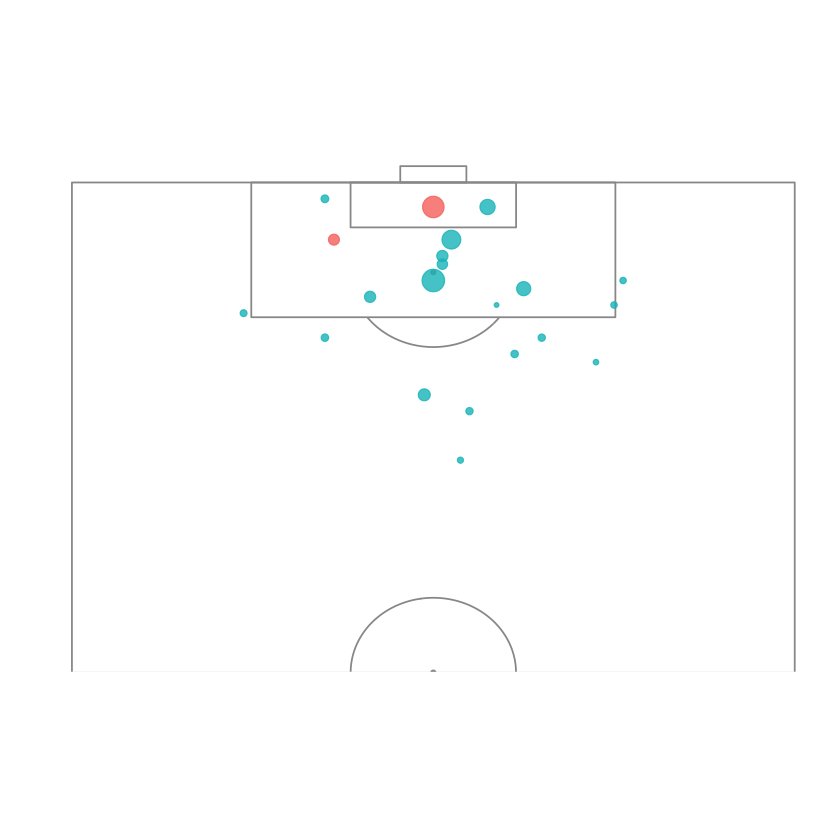

In [13]:
soccerShotmap(shots_marta, lengthPitch = 120, widthPitch = 80, colMiss = "red", colGoal = "blue")